# Experiment 5: Reconstruction Limitations: Number of Views

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv("../eval/TestEvaluation/mesh_eval_results.csv")

In [4]:
relevant_models = [
    "vh_1img",
    "vh_2img",
    "vh_3img",
    "vh_4img",
    "vh_5img",
    "vh_6img",
    "pix2vox_aug_1img",
    "pix2vox_aug",
    "pix2vox_aug_3img",
    "pix2vox_aug_4img",
    "pix2vox_aug_5img",
    "pix2vox_aug_6img"
    # extend with Pixel2Mesh++ and PixelNeRF names as in the CSV file
]

filtered = results[results["model"].isin(relevant_models)]

aggregated = filtered.groupby("model", as_index=False).agg(
    mean_chamfer         = ("chamfer",     "mean"),
    std_chamfer          = ("chamfer",     "std"),
    mean_fscore_1        = ("fscore_1",    "mean"),
    std_fscore_1         = ("fscore_1",    "std"),
    mean_fscore_2_5      = ("fscore_2_5",  "mean"),
    std_fscore_2_5       = ("fscore_2_5",  "std"),
    mean_fscore_5        = ("fscore_5",    "mean"),
    std_fscore_5         = ("fscore_5",    "std"),
    mean_iou             = ("voxel_iou",   "mean"),
    std_iou              = ("voxel_iou",   "std"),
)

aggregated

,model,mean_chamfer,std_chamfer,mean_fscore_1,std_fscore_1,mean_fscore_2_5,std_fscore_2_5,mean_fscore_5,std_fscore_5,mean_iou,std_iou
0,pix2vox_aug,0.059839,0.020741,0.166688,0.060798,0.603350,0.151200,0.848221,0.121432,0.713982,0.176484
1,pix2vox_aug_1img,0.062417,0.019690,0.148271,0.047837,0.576603,0.127046,0.831607,0.114709,0.723872,0.108581
2,pix2vox_aug_3img,0.055425,0.018622,0.178316,0.069002,0.635574,0.142980,0.864877,0.110430,0.738976,0.129375
3,pix2vox_aug_4img,0.057382,0.021190,0.169360,0.069673,0.615489,0.167863,0.855387,0.130177,0.765842,0.093510
4,pix2vox_aug_5img,0.055976,0.016643,0.167743,0.054462,0.612202,0.135544,0.866543,0.101334,0.754659,0.090891
5,pix2vox_aug_6img,0.054871,0.018306,0.176082,0.061838,0.639405,0.138574,0.868861,0.115294,0.746577,0.119281
6,vh_1img,0.134087,0.026163,0.090819,0.025043,0.349706,0.064208,0.547354,0.076316,0.525184,0.092906
7,vh_2img,0.091423,0.024904,0.109239,0.040237,0.416278,0.101777,0.664201,0.120545,0.637425,0.090634
8,vh_3img,0.092882,0.025278,0.110156,0.035966,0.420705,0.100312,0.661849,0.114917,0.634007,0.095497
9,vh_4img,0.088944,0.023458,0.112556,0.039945,0.430458,0.104339,0.675917,0.113687,0.644009,0.086537


In [16]:
visual_hull = aggregated[aggregated['model'].str.contains("vh_")]
pix2vox = aggregated[aggregated['model'].str.contains("pix2vox_aug")]

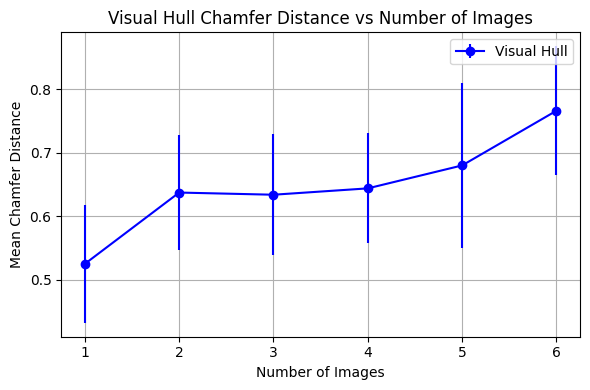

In [15]:
plt.figure(figsize=(6, 4))
plt.errorbar(
    visual_hull['model'].str.extract(r'(\d+)')[0].astype(int),
    visual_hull['mean_iou'],
    yerr=visual_hull['std_iou'],
    fmt='o-',
    label='Visual Hull',
    color='blue'
)
plt.xticks(
    visual_hull['model'].str.extract(r'(\d+)')[0].astype(int),
    rotation=0
)
plt.xlabel('Number of Images')
plt.ylabel('Mean Chamfer Distance')
plt.title('Visual Hull Chamfer Distance vs Number of Images')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
